In [1]:
# Notebooks/analyze-artifact-data.ipynb

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Update the path to match your environment
csv_file = "/Users/harshil/Developer/GitHub_Repos/FailFix/Data/processed/artifact_data.csv"
df = pd.read_csv(csv_file)

df.head()

,image_tag,language,failed_commit,passed_commit,time_to_fix_hours,exceptions
0,wbond-package_control_channel-379589051,Python,2018-05-16T07:40:38Z,2018-05-17T08:06:11Z,24.425833,AssertionError
1,checkstyle-checkstyle-248927615,Java,2017-06-30T20:23:46Z,2017-06-30T20:44:02Z,0.337778,NaN
2,square-retrofit-65662934,Java,2015-06-06T04:35:33Z,2015-06-08T02:55:01Z,46.324444,AssertionError
3,SonarSource-sonar-php-206563528,Java,2017-03-01T11:04:23Z,2017-03-01T14:17:00Z,3.210278,NullPointerException
4,gwtbootstrap3-gwtbootstrap3-49499229,Java,2015-02-04T19:16:29Z,2015-02-04T19:19:21Z,0.047778,NaN


In [3]:
# Check the shape, info, and basic statistics
print("Shape of the DataFrame:", df.shape)
df.info()
display(df.describe(include='all'))

Shape of the DataFrame: (1856, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1856 entries, 0 to 1855
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   image_tag          1856 non-null   object 
 1   language           1856 non-null   object 
 2   failed_commit      1854 non-null   object 
 3   passed_commit      1848 non-null   object 
 4   time_to_fix_hours  1846 non-null   float64
 5   exceptions         952 non-null    object 
dtypes: float64(1), object(5)
memory usage: 87.1+ KB


,image_tag,language,failed_commit,passed_commit,time_to_fix_hours,exceptions
count,1856,1856,1854,1848,1846.000000,952
unique,1856,2,1022,1021,NaN,130
top,wbond-package_control_channel-379589051,Java,2018-05-03T02:49:51Z,2018-05-03T04:53:44Z,NaN,AssertionError
freq,1,1245,10,10,NaN,383
mean,NaN,NaN,NaN,NaN,28.473301,NaN
std,NaN,NaN,NaN,NaN,233.335420,NaN
min,NaN,NaN,NaN,NaN,-64.603889,NaN
25%,NaN,NaN,NaN,NaN,0.142153,NaN
50%,NaN,NaN,NaN,NaN,0.534583,NaN
75%,NaN,NaN,NaN,NaN,5.708611,NaN


In [4]:
# Count missing values in each column
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
image_tag              0
language               0
failed_commit          2
passed_commit          8
time_to_fix_hours     10
exceptions           904
dtype: int64


Artifacts per language:
language
Java      1245
Python     611
Name: count, dtype: int64


/var/folders/_5/3w8pz5d56fb63_28f4qn20900000gn/T/ipykernel_7884/3373112137.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=language_counts.index, y=language_counts.values, palette="viridis")


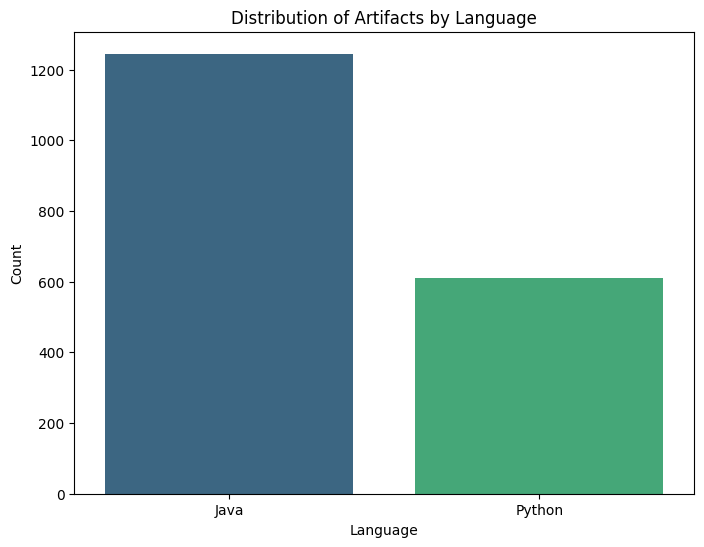

In [5]:
# Count and visualize the frequency of artifacts per language
language_counts = df['language'].value_counts()
print("Artifacts per language:")
print(language_counts)

plt.figure(figsize=(8, 6))
sns.barplot(x=language_counts.index, y=language_counts.values, palette="viridis")
plt.title("Distribution of Artifacts by Language")
plt.xlabel("Language")
plt.ylabel("Count")
plt.show()

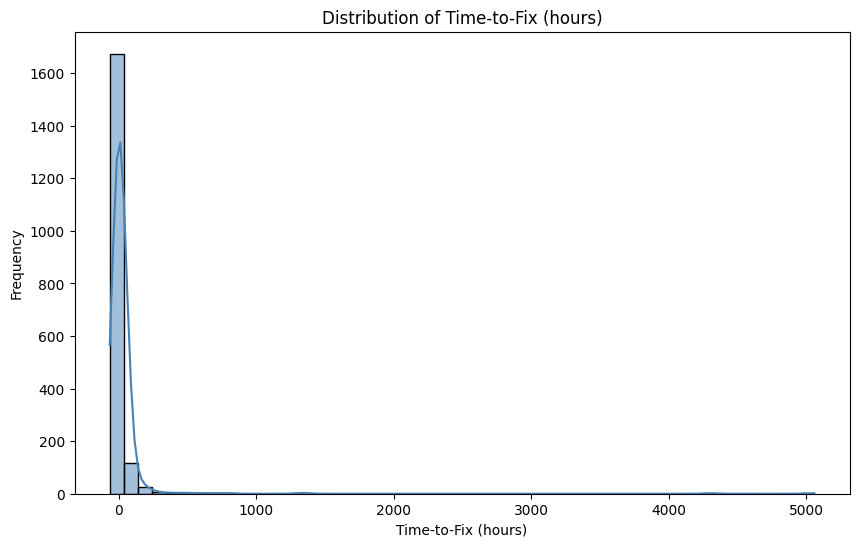

In [6]:
# Plot the distribution of time_to_fix_hours
plt.figure(figsize=(10, 6))
sns.histplot(df['time_to_fix_hours'].dropna(), bins=50, kde=True, color='steelblue')
plt.title("Distribution of Time-to-Fix (hours)")
plt.xlabel("Time-to-Fix (hours)")
plt.ylabel("Frequency")
plt.show()

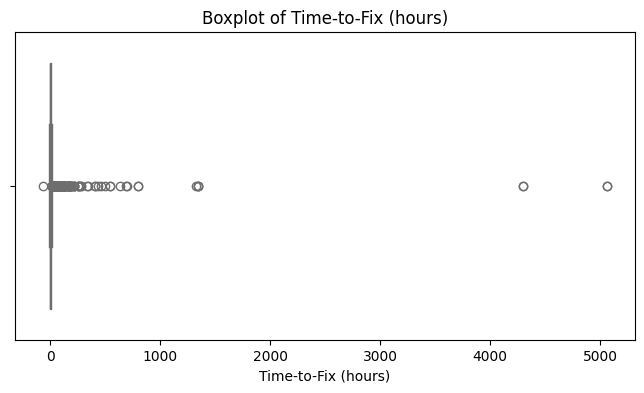

In [7]:
# Create a box plot to visualize outliers in time_to_fix_hours
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['time_to_fix_hours'].dropna(), color='lightcoral')
plt.title("Boxplot of Time-to-Fix (hours)")
plt.xlabel("Time-to-Fix (hours)")
plt.show()

Average Time-to-Fix by Language:
  language  time_to_fix_hours
0     Java          32.903797
1   Python          19.496100


/var/folders/_5/3w8pz5d56fb63_28f4qn20900000gn/T/ipykernel_7884/3232172172.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='language', y='time_to_fix_hours', data=avg_time_by_lang, palette="magma")


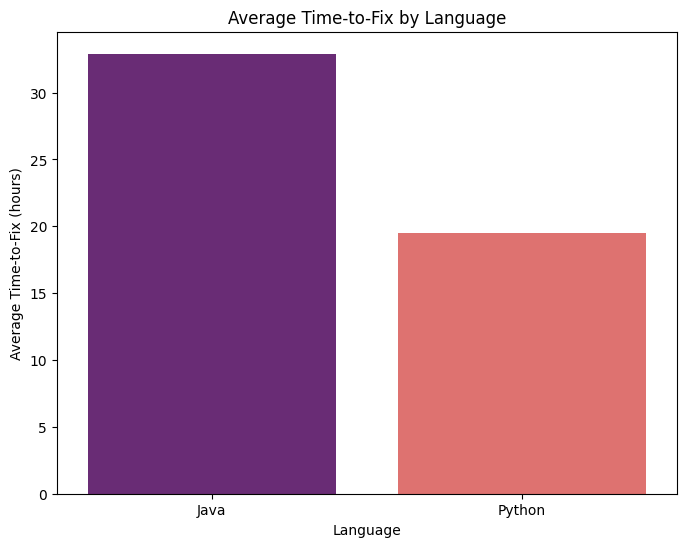

In [8]:
# Compute the average time-to-fix per language
avg_time_by_lang = df.groupby('language')['time_to_fix_hours'].mean().reset_index()
print("Average Time-to-Fix by Language:")
print(avg_time_by_lang)

plt.figure(figsize=(8, 6))
sns.barplot(x='language', y='time_to_fix_hours', data=avg_time_by_lang, palette="magma")
plt.title("Average Time-to-Fix by Language")
plt.xlabel("Language")
plt.ylabel("Average Time-to-Fix (hours)")
plt.show()

Top Exceptions:
exceptions_list
AssertionError              452
ComparisonFailure            76
NullPointerException         74
TypeError                    41
AttributeError               32
IllegalArgumentException     30
IllegalStateException        24
FileNotFoundError            23
ImportError                  18
ClassNotFoundException       18
Name: count, dtype: int64


/var/folders/_5/3w8pz5d56fb63_28f4qn20900000gn/T/ipykernel_7884/2439400074.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=exceptions_counts.index[:10], y=exceptions_counts.values[:10], palette="coolwarm")


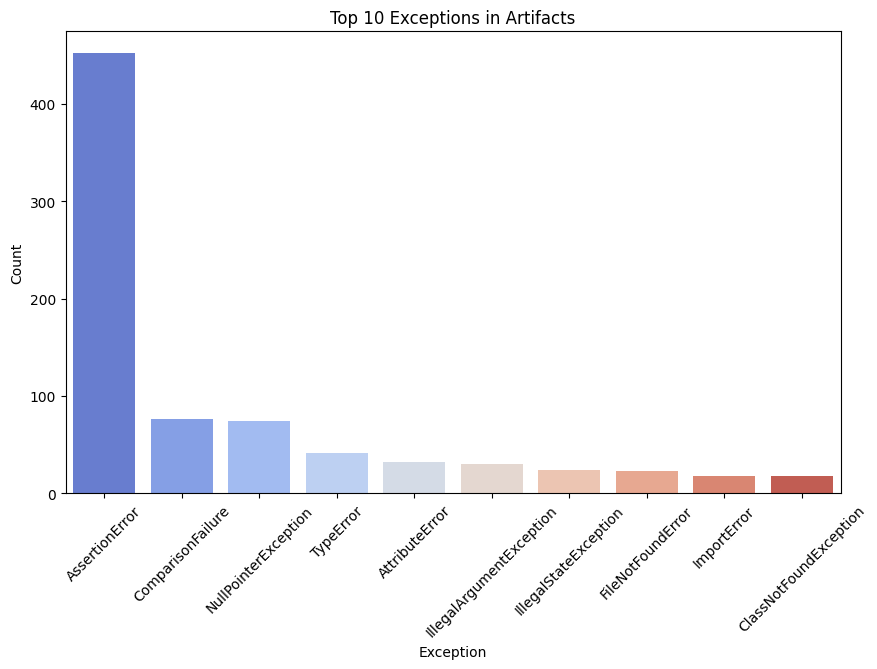

In [9]:
# Define a function to split the semicolon-separated exceptions string into a list
def split_exceptions(ex_str):
    if pd.isnull(ex_str) or ex_str == "":
        return []
    return [ex.strip() for ex in ex_str.split(";")]

# Apply the function to create a new column 'exceptions_list'
df['exceptions_list'] = df['exceptions'].apply(split_exceptions)

# Explode the list to create one row per exception (for counting)
exceptions_exploded = df.explode('exceptions_list')

# Count frequency of each exception
exceptions_counts = exceptions_exploded['exceptions_list'].value_counts()
print("Top Exceptions:")
print(exceptions_counts.head(10))

plt.figure(figsize=(10, 6))
sns.barplot(x=exceptions_counts.index[:10], y=exceptions_counts.values[:10], palette="coolwarm")
plt.title("Top 10 Exceptions in Artifacts")
plt.xlabel("Exception")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [10]:
# Calculate basic statistics for time_to_fix_hours for outlier detection
mean_time = df['time_to_fix_hours'].mean()
std_time = df['time_to_fix_hours'].std()
threshold = mean_time + 3 * std_time

print(f"Mean Time-to-Fix: {mean_time:.2f} hours")
print(f"Standard Deviation: {std_time:.2f} hours")
print(f"Outlier Threshold (mean + 3*std): {threshold:.2f} hours")

# Identify outlier artifacts
outliers = df[df['time_to_fix_hours'] > threshold]
print("Number of outliers:", outliers.shape[0])
display(outliers[['image_tag', 'time_to_fix_hours', 'language']].head())

Mean Time-to-Fix: 28.47 hours
Standard Deviation: 233.34 hours
Outlier Threshold (mean + 3*std): 728.48 hours
Number of outliers: 10


,image_tag,time_to_fix_hours,language
18,charite-jannovar-100092144,1347.240556,Java
67,SonarSource-sonar-java-341335847,1322.962500,Java
102,ocpsoft-rewrite-103410809,4299.342778,Java
135,petergeneric-stdlib-190395339,5058.024444,Java
164,kairosdb-kairosdb-194637034,797.479722,Java


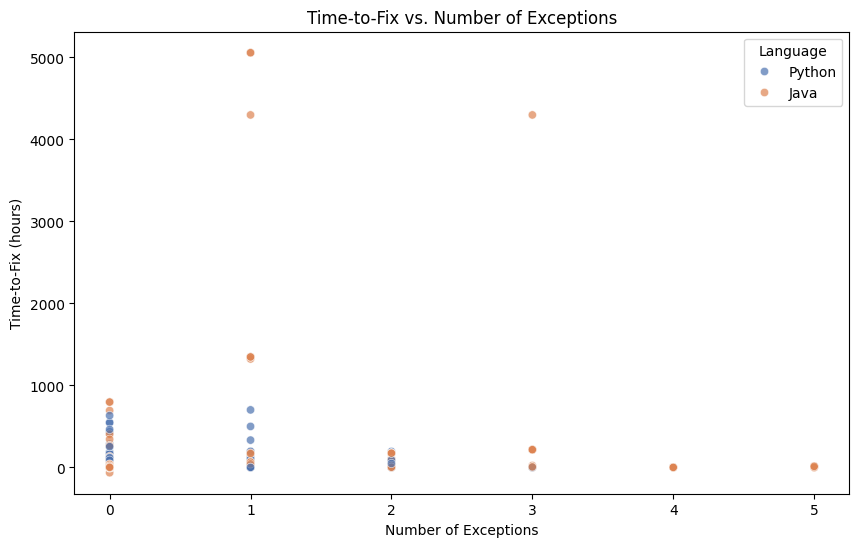

In [11]:
# Create a column that counts the number of exceptions per artifact
df['num_exceptions'] = df['exceptions_list'].apply(len)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='num_exceptions', y='time_to_fix_hours', data=df, hue='language', palette="deep", alpha=0.7)
plt.title("Time-to-Fix vs. Number of Exceptions")
plt.xlabel("Number of Exceptions")
plt.ylabel("Time-to-Fix (hours)")
plt.legend(title="Language")
plt.show()